# This requires a set of geospatial packages not included in ewatercycle


In [1]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import IFrame
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import os
import xarray as xr
from datetime import datetime
from pathlib import Path

In [64]:
path = Path.cwd()

figure_path = path / "Figures"
analysis_path = path.parent/ 'nbs_40_run_all_camels' / "Analysis" 

## load camels geospatial

In [19]:
geospatial_files = analysis_path / "camels_characteristics" 

In [20]:
lst_paths_characteristic = list(geospatial_files.glob('*.feather'))

In [21]:
lst_char_df = []
for path in lst_paths_characteristic:
    df = pd.read_feather(path).set_index('gauge_id')
    df.index.name = "HRU_id"
    lst_char_df.append(df)

df_char_names = lst_char_df[0]
df_char_clim = lst_char_df[1]
df_char_geol = lst_char_df[2]
df_char_hydro= lst_char_df[3]
df_char_soil = lst_char_df[4]
df_char_topo = lst_char_df[5]
df_char_vege = lst_char_df[6]

In [22]:
gdf_catchments = gpd.read_file(geospatial_files / "catchments.gpkg")
gdf_catchments = gdf_catchments[['hru_id','geometry']]
gdf_catchments = gdf_catchments.set_index('hru_id')
gdf_catchments.index.name = "HRU_id"

<Axes: >

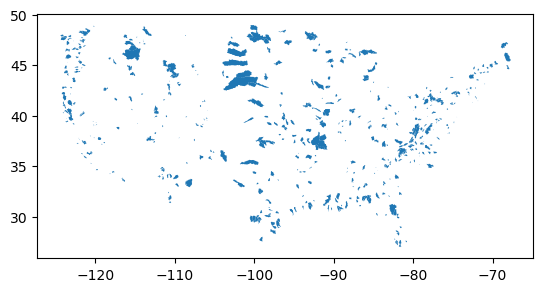

In [23]:
gdf_catchments.plot()

In [16]:
gdf_gauges = gpd.read_file(geospatial_files / "gauges.gpkg")
gdf_gauges = gdf_gauges.set_index('gauge_id')
gdf_gauges.index.name = "HRU_id"
gdf_gauges

,gauge_lat,gauge_lon,elev_mean,slope_mean,area_gages2,area_geospa_fabric,geometry
HRU_id,,,,,,,
1013500,47.23739,-68.58264,250.31,21.64152,2252.70,2303.95,POINT (-68.58264 47.23739)
1022500,44.60797,-67.93524,92.68,17.79072,573.60,620.38,POINT (-67.93524 44.60797)
1030500,45.50097,-68.30596,143.80,12.79195,3676.17,3676.09,POINT (-68.30596 45.50097)
1031500,45.17501,-69.31470,247.80,29.56035,769.05,766.53,POINT (-69.31470 45.17501)
1047000,44.86920,-69.95510,310.38,49.92122,909.10,904.94,POINT (-69.95510 44.86920)
...,...,...,...,...,...,...,...
14309500,42.80400,-123.61091,709.83,110.42527,224.92,226.31,POINT (-123.61091 42.80400)
14316700,43.34984,-122.72894,952.26,119.08920,587.90,588.01,POINT (-122.72894 43.34984)
14325000,42.89150,-124.07065,656.53,124.96889,443.07,444.92,POINT (-124.07065 42.89150)


### plotting to check 

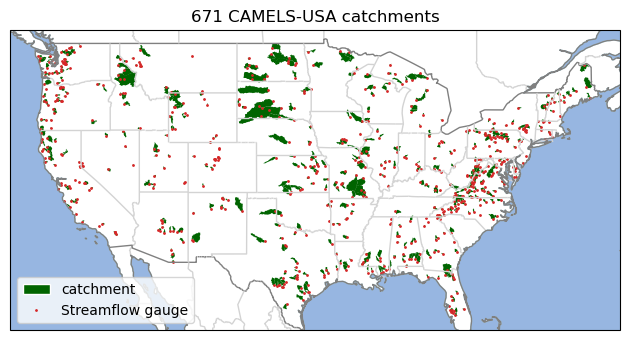

In [18]:
# set up background maps
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

# add legend properties
ms = 1
color = "C3"
catchment_color = "darkgreen"
gdf_catchments.plot(ax=ax,facecolor=catchment_color)
gdf_gauges.plot(ax=ax,markersize=ms,color=color)

ax.set_title(f"{len(gdf_catchments)} CAMELS-USA catchments")
# add legend
legend_gauges = matplotlib.lines.Line2D([],[],color=color,markersize=ms,marker="o",linewidth=0,label='Streamflow gauge')
legend_catchments = matplotlib.patches.Patch(facecolor=catchment_color, edgecolor='w',label=f"catchment")
ax.legend(loc='best', handles=ax.get_legend_handles_labels()[0] + [legend_catchments,legend_gauges])
          
plt.tight_layout()
# plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-with_gauges.png',bbox_inches="tight")

# Choose one catchment

In [96]:
# basin_id = 1439500
# basin_id = 13338500
basin_id = 4045500
chosen_catchment = gdf_catchments.loc[[basin_id]]

In [97]:
chosen_gauge = gdf_gauges.loc[[basin_id]]
gauge_name = df_char_names.loc[basin_id,'gauge_name']

In [98]:
gauge_name

'TAHQUAMENON RIVER NEAR PARADISE, MI'

In [102]:
buffer_chosen_catchment_small = chosen_catchment.buffer(1.5)
buffer_chosen_catchment = chosen_catchment.buffer(10)

C:\Users\david\AppData\Local\Temp\ipykernel_16020\3638205759.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_chosen_catchment_small = chosen_catchment.buffer(1.5)
C:\Users\david\AppData\Local\Temp\ipykernel_16020\3638205759.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_chosen_catchment = chosen_catchment.buffer(10)


In [103]:
USA_extent = (-127.27502975441944, -64.85323562638001, 25.8645493511459, 50.101112651929895)

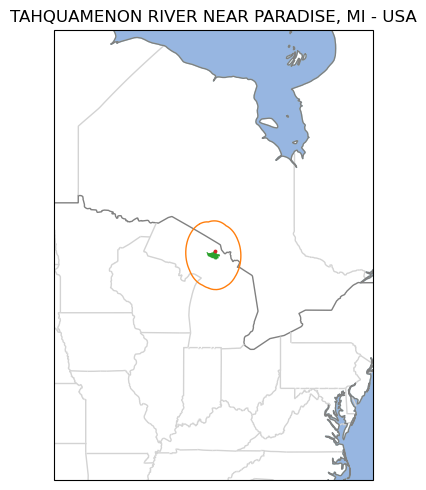

In [104]:
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

catchment_color = "darkgreen"
# custom_cmap = matplotlib.colors.ListedColormap(["sienna","coral","yellow","mediumspringgreen","green",
#                                                 "mediumseagreen","steelblue","darkgreen","lightsalmon","tan",
#                                                 "peru","paleturquoise"])
# custom_cmap = "tab20"
# gdf_catchments_geo.plot(ax=ax,column="hru_id", cmap=custom_cmap, legend=True )
#                     # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})
chosen_catchment.plot(ax=ax,color="C2")
chosen_gauge.plot(ax=ax,color='C3',zorder=10,markersize=3)
buffer_chosen_catchment.plot(ax=ax,facecolor="None", edgecolor="None",zorder=10)
buffer_chosen_catchment_small.plot(ax=ax,facecolor="None", edgecolor="C1",zorder=10)

ax.set_title(f"{gauge_name} - USA")

# ax.set_xlim((USA_extent[0]),USA_extent[1])
# ax.set_ylim((USA_extent[2]),USA_extent[3])

plt.tight_layout()
plt.savefig(fr'{figure_path}\CAMELS-USA-catchments-{chosen_gauge.index.values[0]}-map.png',bbox_inches="tight")
